## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# first loding our data 
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()
# number of rows = 294478 
# we also can see we have no missing values 
rows=294478


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# first we need to know how many users converted
df_e=df.query('converted== 1')
# to find the proportion we divide the number of user  converted by the all the users "rows"
proportion=df_e.shape[0]/rows
proportion * 100
# so The proportion of users converted is approximately equal to 12 %

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# we will work on the group and landing_page 
# new_page usually line up with treatment as we see on the df 
# so we need to find when new_page is paried with contol   or  old_page is paried with treatment
df_e=df.query('landing_page == "new_page" and group == "control"   or landing_page == "old_page" and group == "treatment"  ')
df_e.shape

(3893, 5)

In [7]:
df_e.shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
# we see from df.info the null count has no missing values but to make sure again 
df.isnull().any()
# so no mussing values 

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# to unsure that our Analyze is accurate we need to only deal with the rows that corractly lined up
# so we will create df2 in which we will drop the mislined rows by making a qure on df to extreact only the correctly lined rows
df2 = df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"')

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#df2.duplicated(['user_id'])
repeated = df2[df2.duplicated(['user_id'])]
repeated['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(['user_id'])
# lets make sure we droped one of the repeated user_id  
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# so to find out the probability of an individual converting ingenral is the number of uses converted / total number of users 
# number of uses converted in df2 
p_of_converting=df2.query('converted== 1').shape[0]/df2.shape[0]
p_of_converting

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# first we need to extract the "control" group
df_of_control=df2[df2['group'] == 'control']
# then we  find out how many converted in our "control" group AKA df_of_control then divide that by the total number 
p_of_control=df_of_control.query('converted== 1').shape[0]/df_of_control.shape[0]
p_of_control


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# first we need to extract the "treatment" group
df_of_treatment=df2[df2['group'] == 'treatment']
# then we  find out how many converted in our "treatment" group AKA df_of_treatment then divide that by the total number 
p_of_treatment=df_of_treatment.query('converted== 1').shape[0]/df_of_treatment.shape[0]
p_of_treatment


0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
# to find the probability we extract the individual received the new page then divide this by the total users 
p_new_page= df2[df2['landing_page'] == 'new_page'].shape[0]/df2.shape[0]
p_new_page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

- we find out  that the probability of a convertion has happend in control group "12 % " is higer than treatment group "11 %" but it is such a small difference " approximately 1 % diffrence " so we cant say that the old page has more convertion
- the probability of an indivisual recieved the new page is 50 % so we can say that the diffrence in the conversion rate is approximately has the same amount of traffic for each group 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

-first the null hypothesis is what we assume to be true before analyzing the data ,is that the new page has a converted rate that is less than or equal to that of the old page
H0 : 𝑝𝑛𝑒𝑤<=𝑝𝑜𝑙𝑑

-the alternative hypothesis is what we want to prove to be true, whice  isthat the new page has a higher converted rate than the old page 
H1 :  𝑝𝑛𝑒𝑤>𝑝𝑜𝑙𝑑


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#first the null hypothesis tell us that there is not difference between the conversion rates of old and new page.so we will use df2 
p_new = df2.query('converted== 1').shape[0]/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
#the null hypothesis tell us that there is not difference between the conversion rates of old and new page.so we will use df2 
p_old = df2.query('converted== 1').shape[0]/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1,0],n_old,p=[p_old,(1-p_old)])
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# since our arrays only have 1 and 0 values we can find probability by findind the mean as it the zero values will have no controubte in the sum and than that sum will divide by the total number of values
new_page_converted.mean()/n_new  - old_page_converted.mean()/n_old

1.0392081502176513e-08

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.choice([1,0],n_old,p=[p_old,(1-p_old)])
    new_page_converted = np.random.choice([1,0],n_new,p=[p_new,(1-p_old)])
    diff = new_page_converted.mean() - old_page_converted.mean() 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Frequancy')

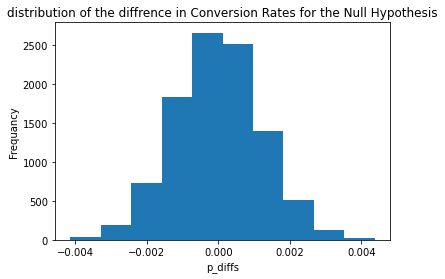

In [27]:
plt.hist(p_diffs)
plt.title('distribution of the diffrence in Conversion Rates for the Null Hypothesis')
plt.xlabel('p_diffs')
plt.ylabel('Frequancy')

we can see that the distibution of diffrences in means between the converted rates for old page and new page is norrmally distributed

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# first lets calculate the actual diffrence in the ab_data set
actual_diff = p_of_treatment - p_of_control
# Convert p_diffs to array
p_diffs = np.array(p_diffs)
# Calculate the propotion of the p_diffs are greater than the actual difference in ab_data.csv
(p_diffs > actual_diff).mean()

0.9047

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

 as we  computed the probability of the observing statistic if the null hypothesis is actually true "P-value" this value means that if it is high ,the old page's performance is better than the new page or the same,and if it is very low then the new page performance is better 
 
and we find that the p-value equals to .904 which is high enough and more than .05,
so we  make a decision that the old page's performance is better than or the same as the new page's performance

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df.query('group == "control" and converted == 1').shape[0]
convert_new = df.query('group == "treatment" and converted == 1').shape[0]
n_old = df.query('group == "control"').shape[0]
n_new = df.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative = 'smaller')
z_score,p_value

(1.2369217547321678, 0.8919419336512124)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

The z-score and the p_value mean that we don't reject the Null that Null being the converted rate of the old_page is the same or better than the converted rate of the new_page. 
The p_value is higher than 0.05 .That means we can not be confident with a 95% confidence level that the converted rate of the new_page is larger than the old_page

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic Regression because The dependent variable is a binary variable (converted or not converted).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# first we define the intercept 
df2['intercept'] = 1
# then we create a dummy variable
df2['ab_page'] = pd.get_dummies(df['landing_page'])['new_page']
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
import statsmodels.api as sm
# lets make our logistic regression model

logistic = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        08:27:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

we find out that The p-value  here is 0.190. which is still greater then 0.05 (our alpha), so we still cannot say our null hypothesis is not true

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

it is indeed a  good idea to consider other factors add into the regression model because it can have an effect on the conversion rate but a  disadvantage that the model can get more complex

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [35]:
# display the df
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [36]:
# lets find out the unique values in the country
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [37]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [56]:
### Create the necessary dummy variables
df_new[['CA', 'US','UK']] = pd.get_dummies(df_new['country'])[['CA','US','UK']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,UK
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1


In [61]:
### Fit Your Linear Model And Obtain the Results

logistic_2 = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results_2 = logistic_2.fit()


Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


In [62]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 May 2021   Pseudo R-squ.:                 -0.2214
Time:                        09:22:21   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

as we can see The p-values for the countries are above 0.05, so we cannot reject the null hypothesis. Countries do not effect significantly differences in the conversion rates

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
#create the interaction columns
df_new["ab_UK"] = df_new["ab_page"] * df_new["UK"]
df_new["ab_CA"] = df_new["ab_page"] * df_new["CA"]

In [63]:
lm = sm.Logit(df_new["converted"], df_new[["intercept", "ab_page", "ab_UK", "ab_CA"]])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 May 2021   Pseudo R-squ.:               3.351e-05
Time:                        09:26:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
ab_UK          0.0257      0.019      1.363      0.173      -0.011       0.063
ab_CA         -0.0644      0.038     -1.679      0.093      -0.140       0.011
==============================================================================
"""

The p_value for both interaction terms is higher than 0.05. so the influence of landing_page in the Uk is not different to the influence of landing_page in the other countries , And the influence of landing_page in Canada is not different to the influence of landing_page in the other countries
soas conclusion we can say that interactions between page and country have no significant effects on conversion

# Conclusions
there is not enough evidence that the new_page increases the conversion rate more than old_page . as we saw in the probability figures, A/B testand regression.also There is no strong evidence that the countries (US, CA, UK) influence the conversion rate.



### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.